In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Circle, RegularPolygon, FancyBboxPatch
from matplotlib.collections import PatchCollection
import seaborn as sns
from itertools import permutations, product
from math import gcd
from functools import reduce

### Groups
A group is an algebraic structure consisting of a set $G$ equipped with a binary operation $\cdot$ that combines any two elements $a, b \in G$ to form another element $a \cdot b$ (Noted as $(G, \cdot)$). To be considered a group, the structure must satisfy four axioms:
1. Closure: For all $a, b \in G$, $a * b \in G$.
2. Associativity: For all $a, b, c \in G$, $(a * b) * c = a * (b * c)$.
3. Identity Element: There exists an element $e \in G$ such that $a * e = e * a = a$.
4. Inverse Element: For every $a \in G$, there exists an element $b \in G$ such that $a * b = b * a = e$

Two of the most critical starting points in group theory are the uniqueness theorems. We state that the identity element $e$ in a group is unique; there cannot be two distinct elements that both act as the identity. Furthermore, for every element $a$ in the group, there exists a unique inverse $a^{-1}$ such that $a \cdot a^{-1} = e$. These properties ensure that group operations are well-defined and reversible.

Lean Reference: See theorem identity_is_unique and theorem inverse_is_unique in AA_Proofs.lean.

In [ ]:
## Caley table


##### Abelian Group
A group $(G, *)$ is Abelian (or commutative) if the order of the operation does not matter:$$a * b = b * a \quad \text{for all } a, b \in G$$

These groups are the most "well-behaved". Basic addition $( \mathbb{Z}, +)$ is Abelian because $2+3 = 3+2$. However, most "rotational" groups are non-Abelian because the order in which you turn an object changes its final position.

##### Cyclic Group
A group is cyclic if every element in the group can be generated by repeatedly applying the group operation to a single element $g$ (called the generator).
* In multiplicative notation: $G = \{g^k \mid k \in \mathbb{Z}\}$.
* In additive notation: $G = \{kg \mid k \in \mathbb{Z}\}$.

Cyclic groups represent "loops." For example, the hours on a clock form a cyclic group of order 12; generated by 1 hour.

##### Symmetric Group
The Symmetric Group $S_n$ is the collection of all bijections (permutations) from a set of $n$ elements to itself.

- Every permutation can be uniquely written as a product of disjoint cycles. Disjoint cycles commute.

- A transposition is a cycle of length 2 (a simple swap). Any permutation can be expressed as a product of transpositions (e.g., $(1 \ 2 \ 3) = (1 \ 3)(1 \ 2)$). While the specific transpositions used may vary, the parity (even or odd) of the number of transpositions is always fixed for a given permutation.

- The order of a permutation is the smallest positive integer $k$ such that $\sigma^k = e$. For a permutation written in disjoint cycles, the order is the Least Common Multiple (LCM) of the lengths of those cycles.

- For $\sigma, \tau \in S_n$, the conjugate of $\sigma$ by $\tau$ is given by $\tau \sigma \tau^{-1}$. In $S_n$, conjugation simply "renames" the elements within the cycle structure of $\sigma$ according to the mapping of $\tau$.

- If $\sigma$ is a cycle of length $k$, then $\sigma^m$ is also a permutation where elements "jump" $m$ steps at a time. If $m$ and $k$ are coprime, $\sigma^m$ remains a single cycle of length $k$.

```
Conjugacy classes

Alternating groups ($A_n$)
```

##### Theorem: Parity of Transpositions
If an element $\sigma \in S_n$ is written as a product of transpositions in two ways:$$\sigma = \sigma_1 \sigma_2 \dots \sigma_k = \tau_1 \tau_2 \dots \tau_l$$

The Parity Theorem establishes that every rearrangement is either "Even" or "Odd." This creates a structural wall in the group, separating $S_n$ into the Alternating Group ($A_n$) and the rest. This distinction is the reason why, in a Rubik's Cube, you can never swap just two corners without affecting something else, you are constrained by the parity of the group. 

Lean Reference: See theorem transposition_parity in AA_Proofs.lean

##### Permutation Group
A group whose elements are permutations (rearrangements) of a set $M$, and the operation is function composition. The group of all permutations of $n$ elements is the Symmetric Group ($S_n$) and has $n!$ elements.

Cayley's Theorem proves that every finite group can be represented as a permutation group.


##### Dihedral Group
The group of symmetries of a regular $n$-sided polygon. It consists of:
* $n$ rotational symmetries.
* $n$ reflectional symmetries.
* Total size (order) is $2n$.

Dihedral groups are more complex types of groups because they are non-Abelian (for $n > 2$). Reflecting a square and then rotating it results in a different orientation than rotating it and then reflecting it.

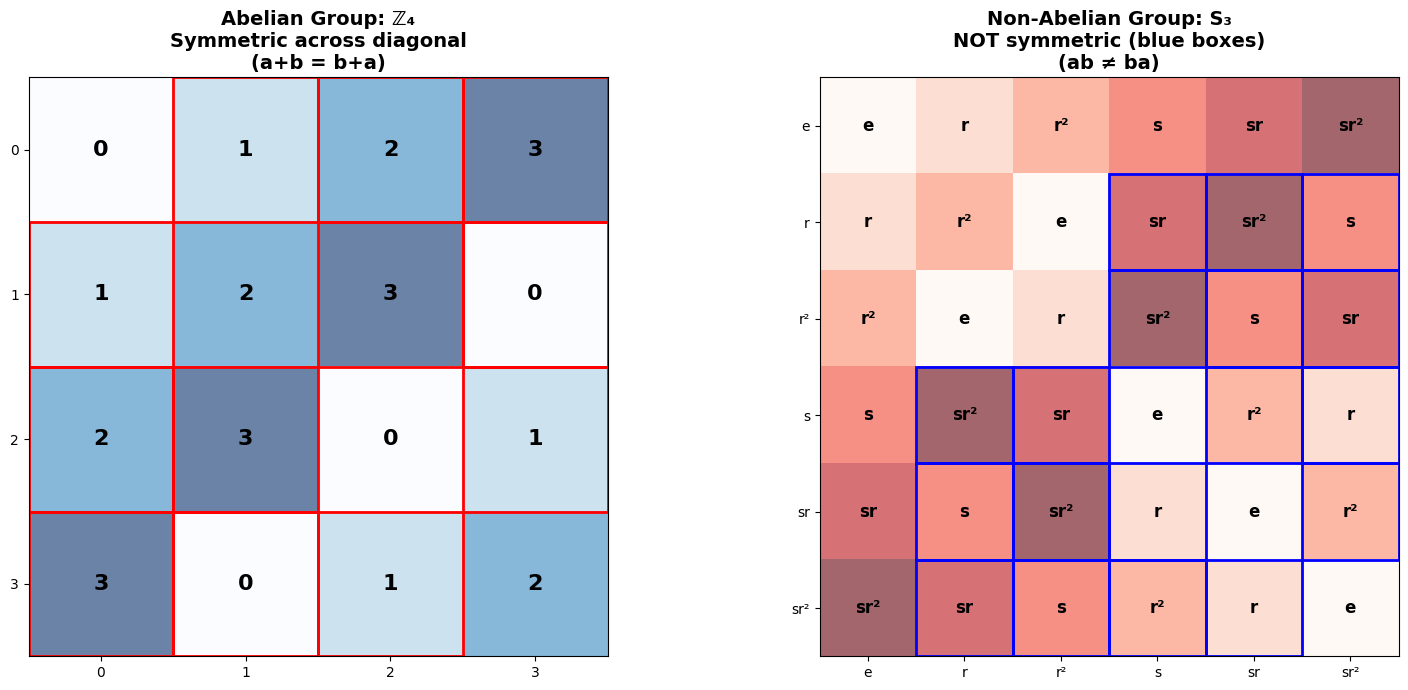

In [17]:
def compare_abelian_nonabelian():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    n = 4
    elements = list(range(n))
    table_z4 = [[(i + j) % n for j in elements] for i in elements]
    
    im1 = ax1.imshow(table_z4, cmap='Blues', alpha=0.6)
    for i in range(n):
        for j in range(n):
            ax1.text(j, i, str(table_z4[i][j]), ha='center', va='center',
                    fontsize=16, weight='bold')
           
            if i < j:
                ax1.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1,
                            fill=False, edgecolor='red', linewidth=2))
                ax1.add_patch(plt.Rectangle((i-0.5, j-0.5), 1, 1,
                            fill=False, edgecolor='red', linewidth=2))
    
    ax1.set_xticks(range(n))
    ax1.set_yticks(range(n))
    ax1.set_xticklabels(elements)
    ax1.set_yticklabels(elements)
    ax1.set_title('Abelian Group: ℤ₄\nSymmetric across diagonal\n(a+b = b+a)',
                 fontsize=14, weight='bold')
    
    s3_elements = ['e', 'r', 'r²', 's', 'sr', 'sr²']
    n = len(s3_elements)
    
    mult_s3 = [
        [0, 1, 2, 3, 4, 5],  # e
        [1, 2, 0, 4, 5, 3],  # r
        [2, 0, 1, 5, 3, 4],  # r²
        [3, 5, 4, 0, 2, 1],  # s
        [4, 3, 5, 1, 0, 2],  # sr
        [5, 4, 3, 2, 1, 0],  # sr²
    ]
    
    im2 = ax2.imshow(mult_s3, cmap='Reds', alpha=0.6)
    for i in range(n):
        for j in range(n):
            ax2.text(j, i, s3_elements[mult_s3[i][j]], ha='center', va='center',
                    fontsize=12, weight='bold')
          
            if mult_s3[i][j] != mult_s3[j][i]:
                ax2.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1,
                            fill=False, edgecolor='blue', linewidth=2))
    
    ax2.set_xticks(range(n))
    ax2.set_yticks(range(n))
    ax2.set_xticklabels(s3_elements, fontsize=10)
    ax2.set_yticklabels(s3_elements, fontsize=10)
    ax2.set_title('Non-Abelian Group: S₃\nNOT symmetric (blue boxes)\n(ab ≠ ba)',
                 fontsize=14, weight='bold')
    
    plt.tight_layout()
    return fig

fig19 = compare_abelian_nonabelian()
plt.show()

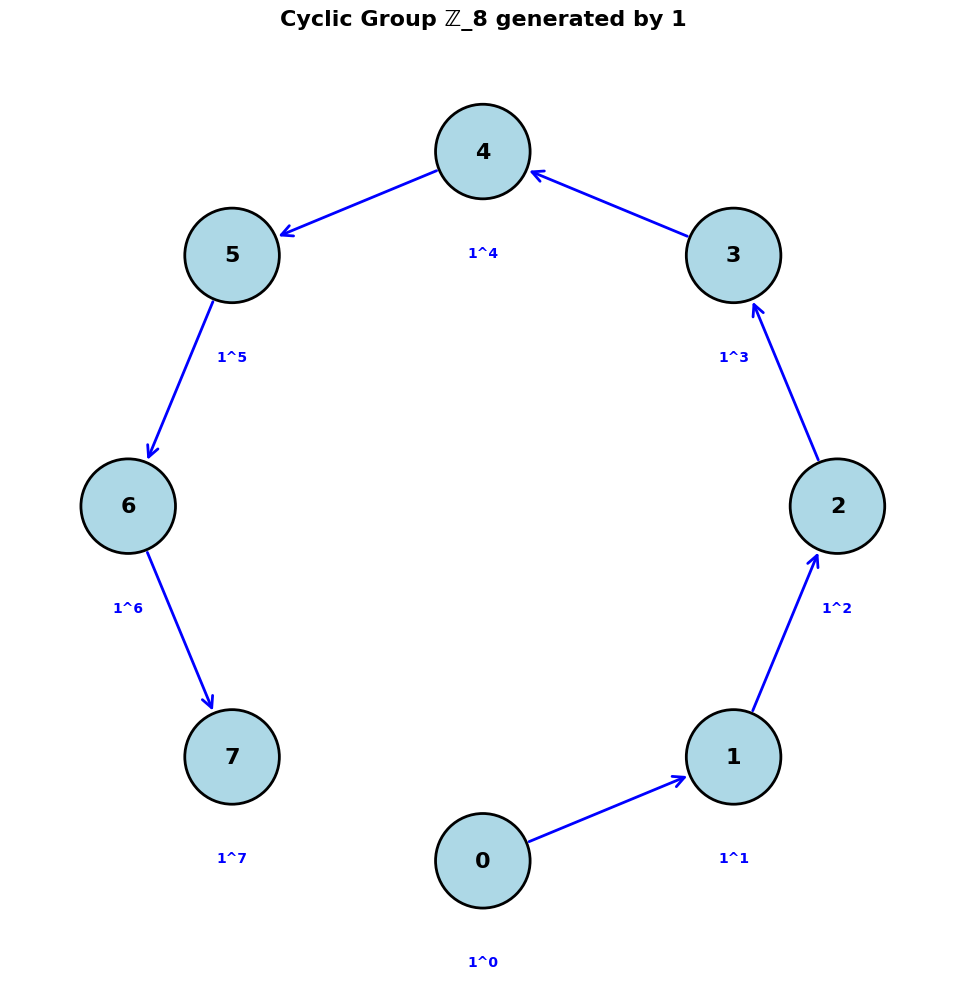

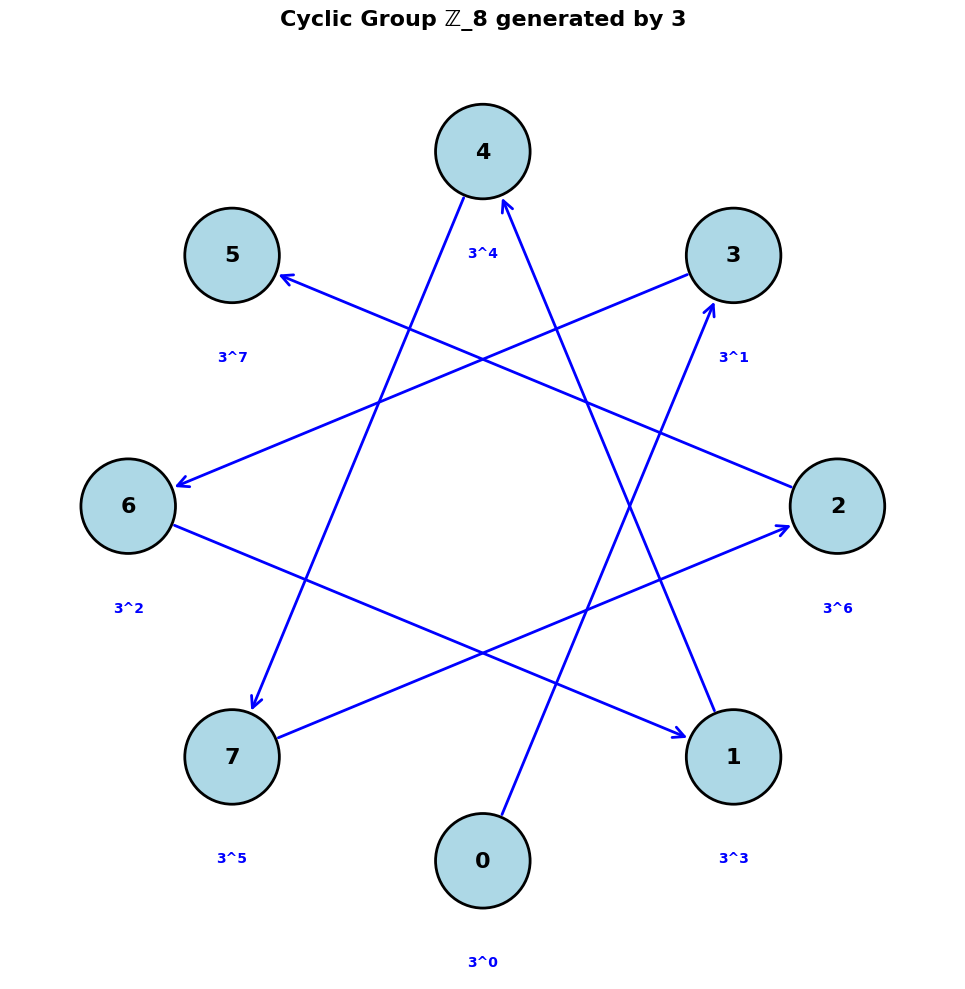

In [18]:
def visualize_cyclic_group(n, generator=1):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    angles = angles - np.pi/2  
    
    radius = 3
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)
    
    powers = [(generator * i) % n for i in range(n)]
    
    for i, (xi, yi) in enumerate(zip(x, y)):
        color = 'lightblue' if i in powers else 'lightgray'
        circle = Circle((xi, yi), 0.4, color=color, ec='black', linewidth=2, zorder=3)
        ax.add_patch(circle)
        ax.text(xi, yi, str(i), ha='center', va='center', fontsize=16, weight='bold', zorder=4)
        
        if i in powers:
            power_idx = powers.index(i)
            ax.text(xi, yi-0.8, f'{generator}^{power_idx}', ha='center', va='top', 
                   fontsize=10, color='blue', weight='bold')
    
    for i in range(len(powers)-1):
        start_idx = powers[i]
        end_idx = powers[i+1]
        
        x1, y1 = x[start_idx], y[start_idx]
        x2, y2 = x[end_idx], y[end_idx]
        
        dx, dy = x2 - x1, y2 - y1
        length = np.sqrt(dx**2 + dy**2)
        dx, dy = dx/length, dy/length
        
        arrow = FancyArrowPatch((x1 + 0.4*dx, y1 + 0.4*dy),
                               (x2 - 0.4*dx, y2 - 0.4*dy),
                               arrowstyle='->', mutation_scale=20, linewidth=2,
                               color='blue', zorder=2)
        ax.add_patch(arrow)
    
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'Cyclic Group ℤ_{n} generated by {generator}', fontsize=16, weight='bold')
    plt.tight_layout()
    return fig

fig2 = visualize_cyclic_group(8, generator=1)
plt.show()

fig3 = visualize_cyclic_group(8, generator=3)
plt.show()

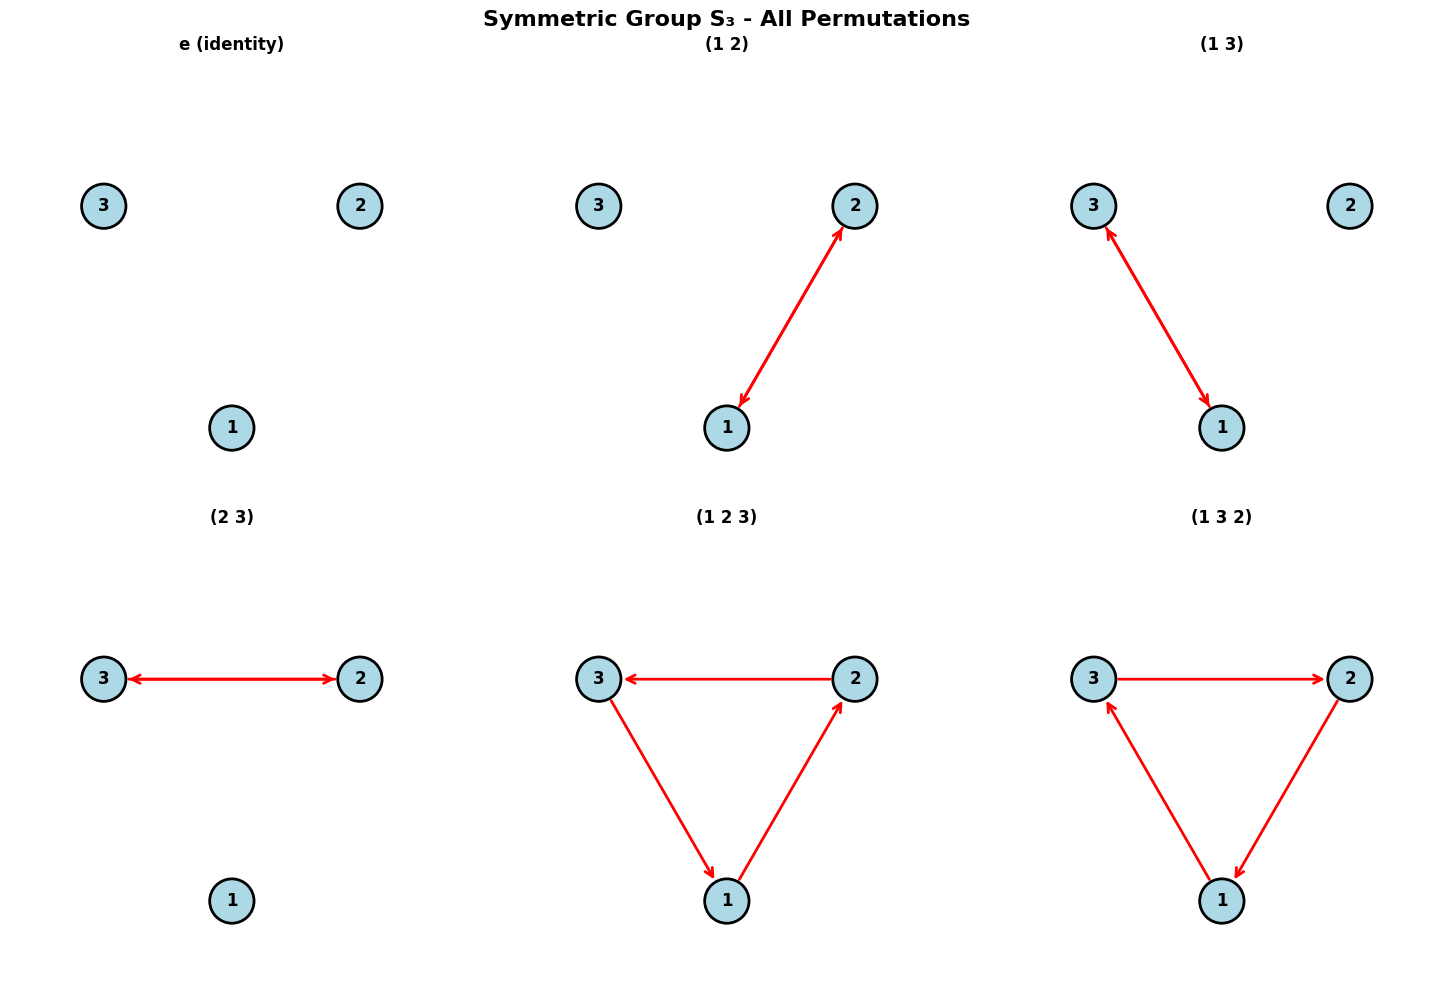

In [6]:
# Cycle structure visualization
def visualize_cycle_structure(perm_dict):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, (name, perm) in enumerate(perm_dict.items()):
        ax = axes[idx]
        n = len(perm)
        
        angles = np.linspace(0, 2*np.pi, n, endpoint=False) - np.pi/2
        radius = 1
        x = radius * np.cos(angles)
        y = radius * np.sin(angles)
        
        # Draw nodes
        for i in range(n):
            circle = Circle((x[i], y[i]), 0.15, color='lightblue', 
                          ec='black', linewidth=2, zorder=3)
            ax.add_patch(circle)
            ax.text(x[i], y[i], str(i+1), ha='center', va='center', 
                   fontsize=12, weight='bold', zorder=4)
        
        # Draw arrows
        for i in range(n):
            j = perm[i]
            if i != j:
                dx = x[j] - x[i]
                dy = y[j] - y[i]
                length = np.sqrt(dx**2 + dy**2)
                dx, dy = dx/length, dy/length
                
                arrow = FancyArrowPatch((x[i] + 0.15*dx, y[i] + 0.15*dy),
                                       (x[j] - 0.15*dx, y[j] - 0.15*dy),
                                       arrowstyle='->', mutation_scale=15,
                                       linewidth=2, color='red', zorder=2)
                ax.add_patch(arrow)
        
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(name, fontsize=12, weight='bold')
    
    plt.suptitle('Symmetric Group S₃ - All Permutations', fontsize=16, weight='bold')
    plt.tight_layout()
    return fig

s3_perms = {
    'e (identity)': [0, 1, 2],
    '(1 2)': [1, 0, 2],
    '(1 3)': [2, 1, 0],
    '(2 3)': [0, 2, 1],
    '(1 2 3)': [1, 2, 0],
    '(1 3 2)': [2, 0, 1]
}

fig7 = visualize_cycle_structure(s3_perms)
plt.show()

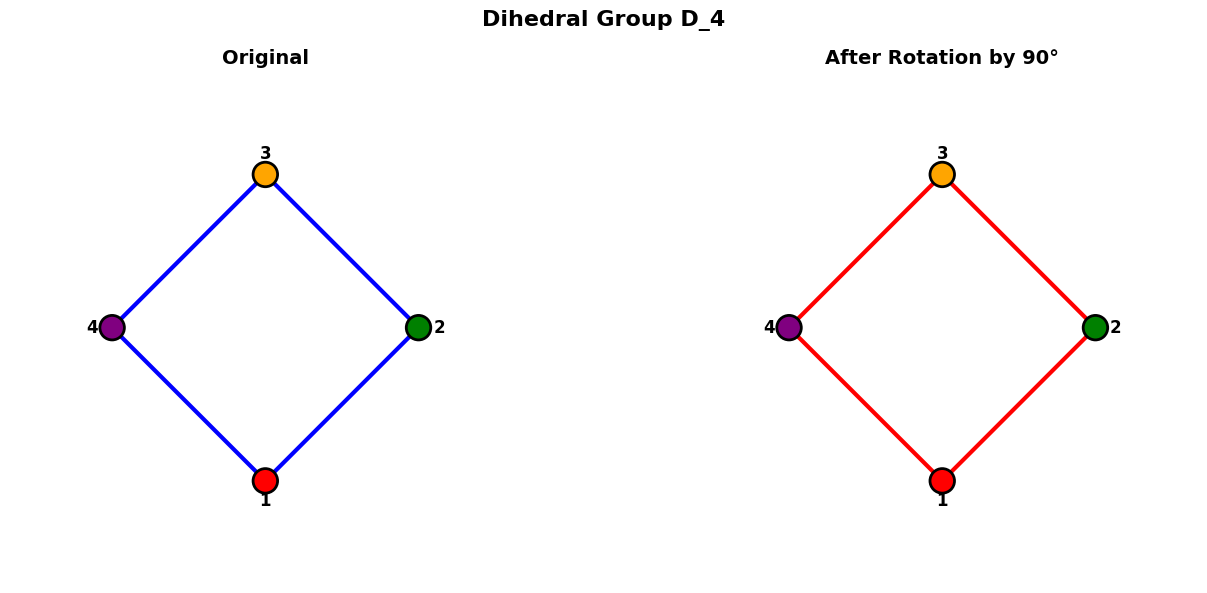

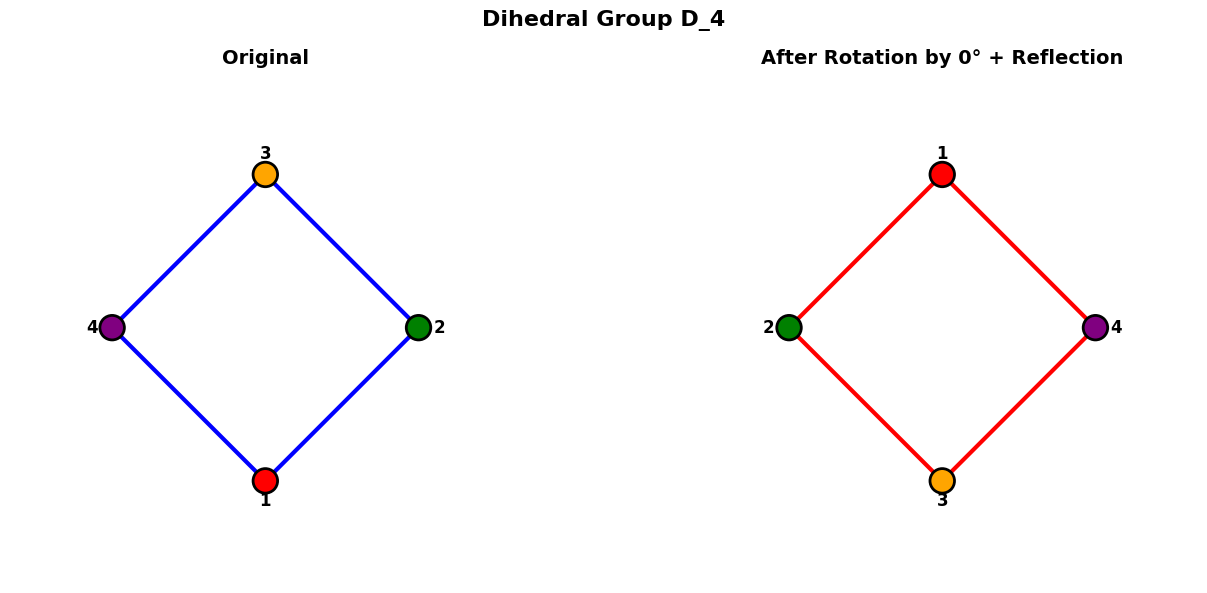

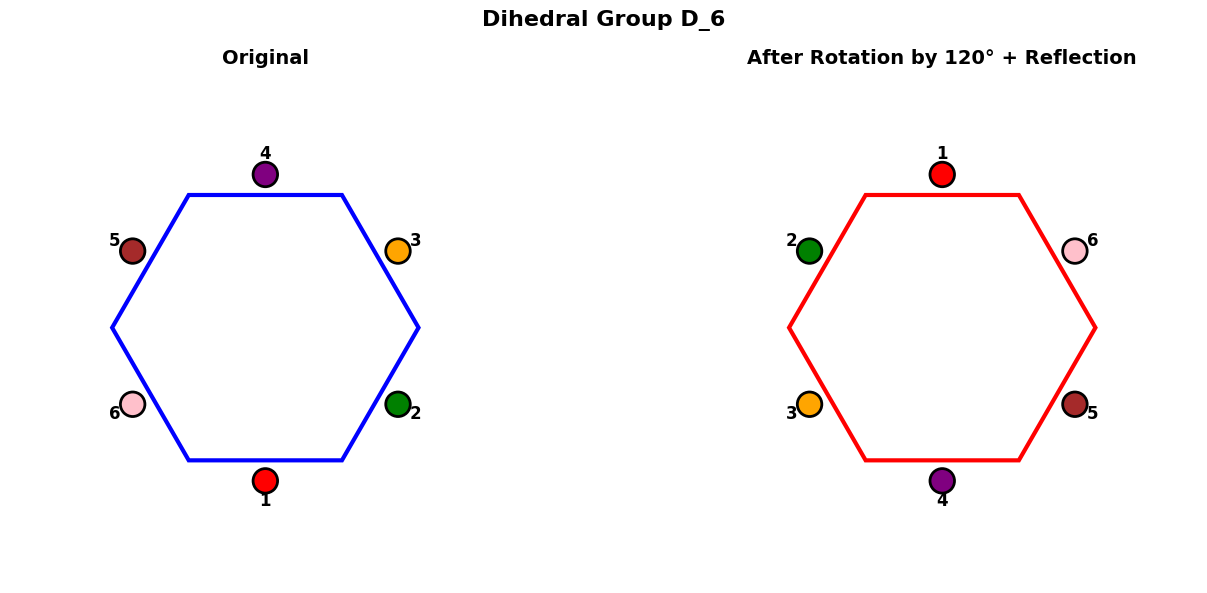

In [7]:
def visualize_dihedral_group(n=4, rotation=0, reflect=False):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    angles = np.linspace(0, 2*np.pi, n, endpoint=False) - np.pi/2
    x_orig = np.cos(angles)
    y_orig = np.sin(angles)
    
    poly1 = RegularPolygon((0, 0), n, radius=1.5, orientation=np.pi/2,
                           fill=False, edgecolor='blue', linewidth=3)
    ax1.add_patch(poly1)
    
    colors = ['red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan']
    for i in range(n):
        circle = Circle((x_orig[i]*1.5, y_orig[i]*1.5), 0.12, 
                       color=colors[i % len(colors)], ec='black', linewidth=2)
        ax1.add_patch(circle)
        ax1.text(x_orig[i]*1.7, y_orig[i]*1.7, str(i+1), 
                ha='center', va='center', fontsize=12, weight='bold')
    
    ax1.set_xlim(-2.5, 2.5)
    ax1.set_ylim(-2.5, 2.5)
    ax1.set_aspect('equal')
    ax1.axis('off')
    ax1.set_title('Original', fontsize=14, weight='bold')
    
    angles_new = angles - (rotation * 2 * np.pi / n)
    x_new = np.cos(angles_new)
    y_new = np.sin(angles_new)
    
    if reflect:
        y_new = -y_new
    
    poly2 = RegularPolygon((0, 0), n, radius=1.5, 
                           orientation=np.pi/2 - (rotation * 2 * np.pi / n),
                           fill=False, edgecolor='red', linewidth=3)
    ax2.add_patch(poly2)
    
    vertex_map = list(range(n))
    vertex_map = [(i - rotation) % n for i in vertex_map]
    if reflect:
        vertex_map = [(-i) % n for i in vertex_map]
    
    for i in range(n):
        circle = Circle((x_new[i]*1.5, y_new[i]*1.5), 0.12, 
                       color=colors[vertex_map[i] % len(colors)], 
                       ec='black', linewidth=2)
        ax2.add_patch(circle)
        ax2.text(x_new[i]*1.7, y_new[i]*1.7, str(vertex_map[i]+1), 
                ha='center', va='center', fontsize=12, weight='bold')
    
    ax2.set_xlim(-2.5, 2.5)
    ax2.set_ylim(-2.5, 2.5)
    ax2.set_aspect('equal')
    ax2.axis('off')
    
    transform_str = f"Rotation by {rotation * 360 // n}°"
    if reflect:
        transform_str += " + Reflection"
    ax2.set_title(f'After {transform_str}', fontsize=14, weight='bold')
    
    plt.suptitle(f'Dihedral Group D_{n}', fontsize=16, weight='bold')
    plt.tight_layout()
    return fig

fig8 = visualize_dihedral_group(4, rotation=1, reflect=False)
plt.show()

fig9 = visualize_dihedral_group(4, rotation=0, reflect=True)
plt.show()

fig10 = visualize_dihedral_group(6, rotation=2, reflect=True)
plt.show()

### Subgroups 
A subgroup $H$ is a subset of $G$ that satisfies the group axioms under the same operation as $G$.

##### Lagrange's Theorem:
Let $G$ be a finite group and $H$ be a subgroup of $G$ ($H \le G$). Then the order of $H$ must divide the order of $G$:$$|H| \mid |G|$$Furthermore, the number of distinct left cosets of $H$ in $G$ (called the index $[G:H]$) is given by:$$[G:H] = \frac{|G|}{|H|}$$ groups have a rigid, interlocking structure. If your group has 12 elements, you can never have a subgroup of size 5, because 5 doesn't divide 12.

##### Conjugates
A subgroup $K$ is a conjugate of $H$ if there exists some $g \in G$ such that $K = gHg^{-1}$. Conjugation can be thought of as "viewing the subgroup from the perspective of a different element."

##### Normal subgroup 
($N \triangleleft G$): A subgroup is normal if it is invariant under conjugation, meaning $gNg^{-1} = N$ for all $g \in G$. Equivalently, its left and right cosets are identical ($gN = Ng$). Normal subgroups are the only subgroups you can "divide" by to form a Quotient Group.

##### Simple subgroup
A group is called "simple" if it has no normal subgroups other than the identity group and itself. Simple groups are the "prime numbers" of group theory. They cannot be broken down into smaller group pieces.


### Cosets
If $H$ is a subgroup of $G$ and $g \in G$, the left coset is $gH = \{gh : h \in H\}$ and the right coset is $Hg = \{hg : h \in H\}$. Cosets partition the group $G$ into equal-sized, non-overlapping pieces.


/var/folders/v4/ll98xkld14g9tg5r1jjcr5j80000gn/T/ipykernel_87853/3296551039.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  big_circle = Circle((x, 5), 2.5, color=color, alpha=0.3,
/var/folders/v4/ll98xkld14g9tg5r1jjcr5j80000gn/T/ipykernel_87853/3296551039.py:37: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  small_circle = Circle(positions[i], 0.6, color=color,


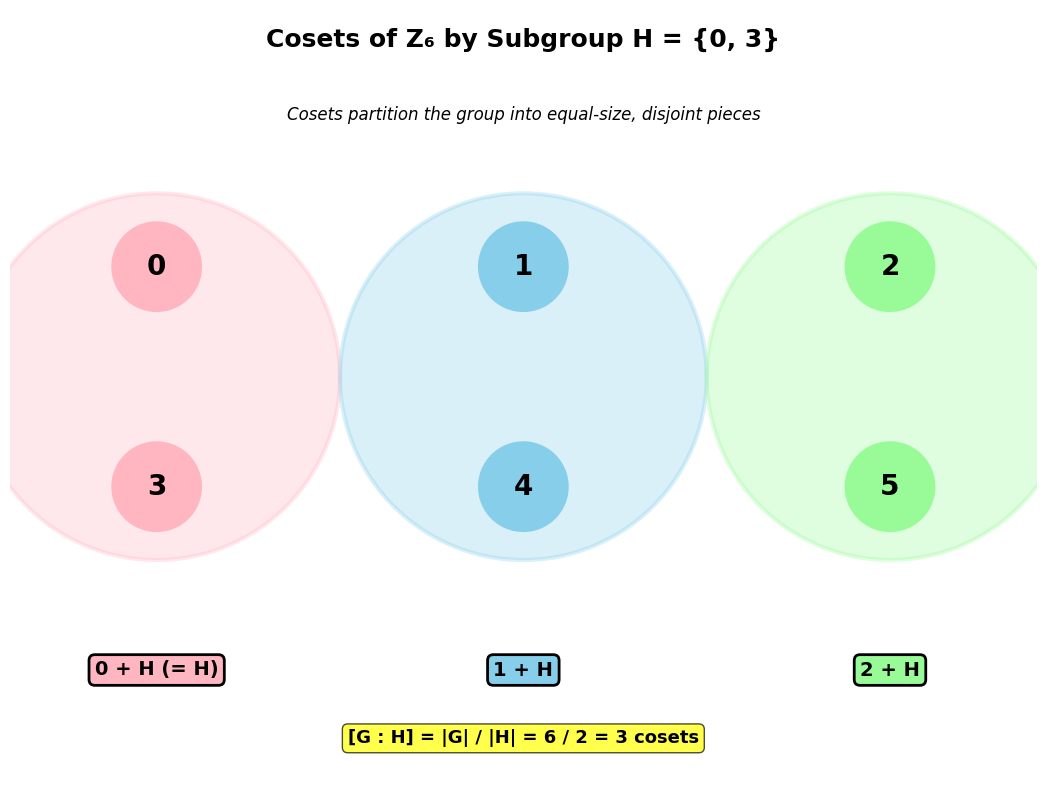

In [26]:
def visualize_cosets_simple():
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Group Z_6 = {0, 1, 2, 3, 4, 5}
    elements = list(range(6))
    
    # Subgroup H = {0, 3}
    H = [0, 3]
    
    cosets = {
        '0 + H (= H)': [0, 3],
        '1 + H': [1, 4],
        '2 + H': [2, 5]
    }
    
    colors = ['#FFB6C1', '#87CEEB', '#98FB98']  # Pink, Sky Blue, Pale Green
    
    x_positions = [2, 7, 12]
    
    for idx, (coset_name, coset_elements) in enumerate(cosets.items()):
        x = x_positions[idx]
        color = colors[idx]
        
        big_circle = Circle((x, 5), 2.5, color=color, alpha=0.3, 
                           edgecolor='black', linewidth=3)
        ax.add_patch(big_circle)
        
        positions = [(x, 6.5), (x, 3.5)]
        for i, elem in enumerate(coset_elements):
            small_circle = Circle(positions[i], 0.6, color=color, 
                                edgecolor='black', linewidth=2)
            ax.add_patch(small_circle)
            ax.text(positions[i][0], positions[i][1], str(elem), 
                   ha='center', va='center', fontsize=20, weight='bold')
        
        ax.text(x, 1, coset_name, ha='center', va='center', fontsize=14, 
               weight='bold', bbox=dict(boxstyle='round', facecolor=color, 
               edgecolor='black', linewidth=2))
    
    ax.text(7, 9.5, 'Cosets of Z₆ by Subgroup H = {0, 3}', 
           ha='center', fontsize=18, weight='bold')
    ax.text(7, 8.5, 'Cosets partition the group into equal-size, disjoint pieces', 
           ha='center', fontsize=12, style='italic')
    
    ax.text(7, 0, '[G : H] = |G| / |H| = 6 / 2 = 3 cosets', 
           ha='center', fontsize=13, weight='bold',
           bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
    
    ax.set_xlim(0, 14)
    ax.set_ylim(-0.5, 10)
    ax.set_aspect('equal')
    ax.axis('off')
    
    return fig

fig1 = visualize_cosets_simple()
plt.tight_layout()
plt.show()

/var/folders/v4/ll98xkld14g9tg5r1jjcr5j80000gn/T/ipykernel_87853/2877331579.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = Circle((x, y), 0.8, color=color, edgecolor='black', linewidth=3)


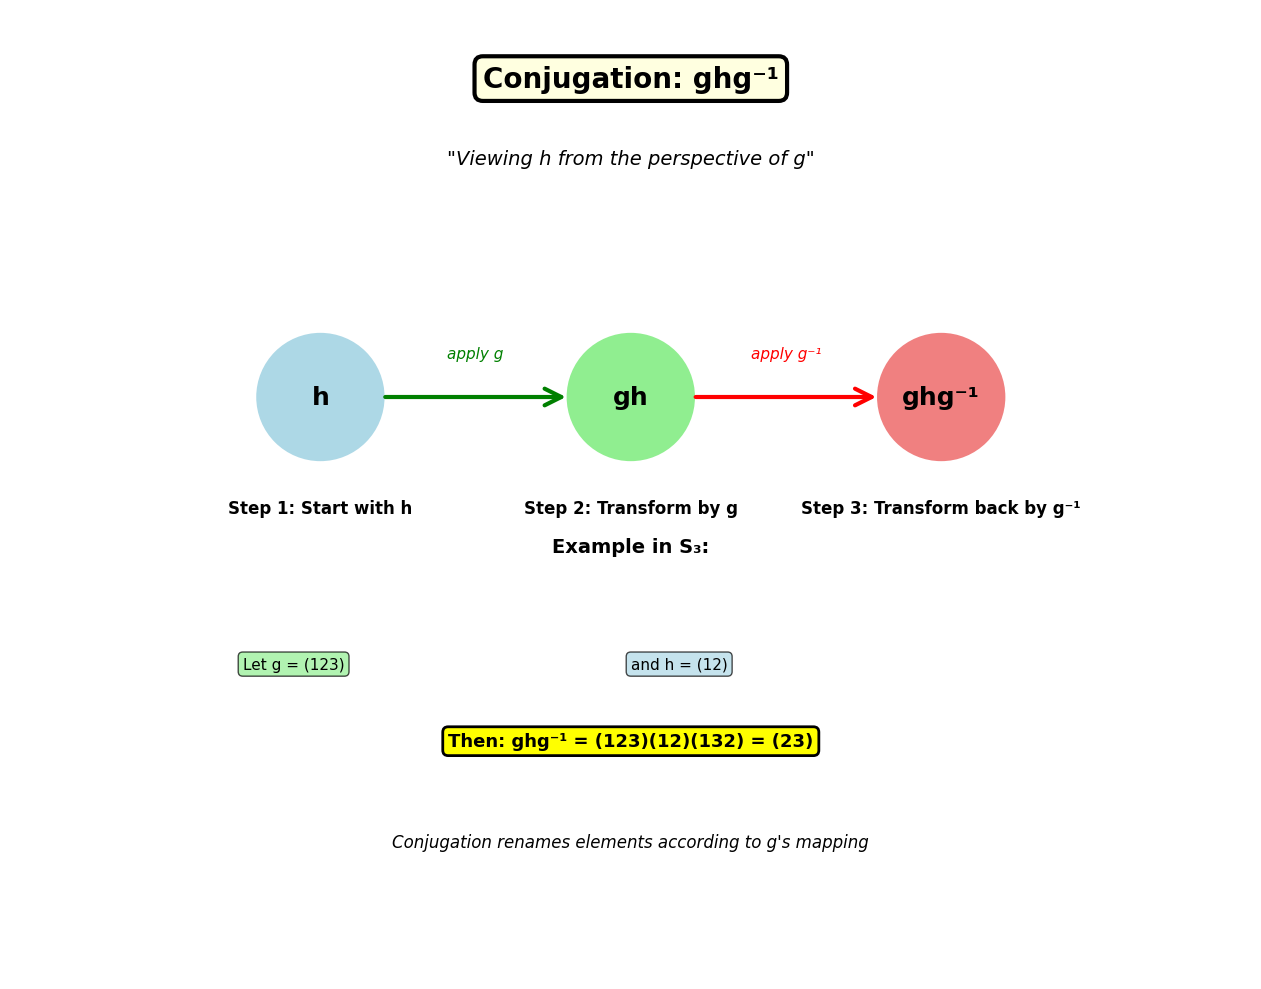

In [35]:
def visualize_conjugation_simple():
    fig, ax = plt.subplots(figsize=(16, 10))
    
    ax.text(8, 11, 'Conjugation: ghg⁻¹', 
           ha='center', fontsize=20, weight='bold',
           bbox=dict(boxstyle='round', facecolor='lightyellow', 
           edgecolor='black', linewidth=3))
    
    ax.text(8, 10, '"Viewing h from the perspective of g"', 
           ha='center', fontsize=14, style='italic')
    
    steps = [
        ('Step 1: Start with h', 4, 7, 'lightblue', 'h'),
        ('Step 2: Transform by g', 8, 7, 'lightgreen', 'gh'),
        ('Step 3: Transform back by g⁻¹', 12, 7, 'lightcoral', 'ghg⁻¹')
    ]
    
    for step_text, x, y, color, label in steps:
        circle = Circle((x, y), 0.8, color=color, edgecolor='black', linewidth=3)
        ax.add_patch(circle)
        ax.text(x, y, label, ha='center', va='center', 
               fontsize=18, weight='bold')

        ax.text(x, y - 1.5, step_text, ha='center', fontsize=12, weight='bold')
    
    arrow1 = FancyArrowPatch((4.8, 7), (7.2, 7),
                            arrowstyle='->', mutation_scale=30, 
                            linewidth=3, color='green')
    ax.add_patch(arrow1)
    ax.text(6, 7.5, 'apply g', ha='center', fontsize=11, 
           style='italic', color='green')
    
    arrow2 = FancyArrowPatch((8.8, 7), (11.2, 7),
                            arrowstyle='->', mutation_scale=30, 
                            linewidth=3, color='red')
    ax.add_patch(arrow2)
    ax.text(10, 7.5, 'apply g⁻¹', ha='center', fontsize=11, 
           style='italic', color='red')
    
    # Example with S_3
    ax.text(8, 5, 'Example in S₃:', ha='center', fontsize=14, weight='bold')
    
    example_y = 3.5
    ax.text(3, example_y, 'Let g = (123)', fontsize=11, 
           bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    ax.text(8, example_y, 'and h = (12)', fontsize=11,
           bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    
    ax.text(8, 2.5, 'Then: ghg⁻¹ = (123)(12)(132) = (23)', 
           ha='center', fontsize=13, weight='bold',
           bbox=dict(boxstyle='round', facecolor='yellow', 
           edgecolor='black', linewidth=2))
    
    ax.text(8, 1.2, 'Conjugation renames elements according to g\'s mapping', 
           ha='center', fontsize=12, style='italic')
    

    ax.set_xlim(0, 16)
    ax.set_ylim(-0.5, 12)
    ax.set_aspect('equal')
    ax.axis('off')
    
    return fig

fig3 = visualize_conjugation_simple()
plt.tight_layout()
plt.show()

### Group actions
A group action is a formal way of using a group $G$ to map elements of a set $X$. Formally, an action of $G$ on $X$ is a function $G \times X \to X$ (denoted $g \cdot x$) such that:
- Identity: $e \cdot x = x$ for all $x \in X$.
- Compatibility: $(gh) \cdot x = g \cdot (h \cdot x)$ for all $g, h \in G$.
- The orbit of an element $x \in X$ is the set of all places $x$ can be moved by the group: $orb(Gx) = \{g \cdot x \mid g \in G\}$. Orbits partition the set $X$.
- The stabilizer of $x$ is the subgroup of $G$ consisting of elements that leave $x$ fixed: $stab(G_x) = \{g \in G \mid g \cdot x = x\}$.
- Orbit-Stabilizer Theorem: For a finite group $G$, the size of the orbit times the size of the stabilizer equals the order of the group: $|G| = |orb(Gx)| \cdot |stab(G_x)|$.

##### Direct sum of groups
The Direct Sum (or Direct Product for finite groups) $G \oplus H$ is a way to build a larger group from two smaller ones.Here the elements are ordered pairs $(g, h)$ where $g \in G$ and $h \in H$. With operations that are component-wise multiplication: $(g_1, h_1) * (g_2, h_2) = (g_1g_2, h_1h_2)$. The identity would be $(e_G, e_H)$. 

### Homomorphisms 
A homomorphism is a map between two algebraic structures of the same type (such as two groups) that preserves the operations defined on them. If we have a map $f: G \to H$, it is a homomorphism if $f(a * b) = f(a) \cdot f(b)$ for all $a, b \in G$. Essentially, a homomorphism is a "structure-preserving" translation. It ensures that the result of performing an operation in the first group and then mapping it to the second is the same as mapping the individual elements first and then performing the operation in the second group.

### Isomorphisms
An isomorphism is a special type of homomorphism that establishes a perfect, one-to-one correspondence between two algebraic structures. For a map $f: G \to H$ to be an isomorphism, it must be a homomorphism that is also a bijection (both injective and surjective). While a general homomorphism might "shrink" or "collapse" a group (like a shadow), an isomorphism preserves every bit of information. If an isomorphism exists between $G$ and $H$, the two groups are said to be isomorphic, denoted $G \cong H$. 

##### Theorems
If $f: G \to H$ is a group homomorphism, then:
- $\text{Image}(f) \leq H$ (The image of $f$ is a subgroup of $H$) 
- $\ker(f) \trianglelefteq G$ (The kernel of $f$ is a normal subgroup of $G$)
- $G / \ker(f) \cong \text{Im}(f)$

If $G$ is a group, $S \leq G$, and $N \trianglelefteq G$, then:
- $SN \leq G$ 
- $N \trianglelefteq SN$
- $S \cap N \trianglelefteq S$
- $SN / N \cong S / (S \cap N)$

If $G$ is a group and $N \trianglelefteq G$, then:
- Correspondence Theorem:There is a $1:1$ correspondence between subgroups $K$ of $G$ that contain $N$ ($N \leq K \leq G$) and subgroups of $G/N$ ($K/N \leq G/N$).
- There is a $1:1$ correspondence between normal subgroups $K$ of $G$ that contain $N$ ($N \trianglelefteq K \trianglelefteq G$) and normal subgroups of $G/N$ ($K/N \trianglelefteq G/N$).


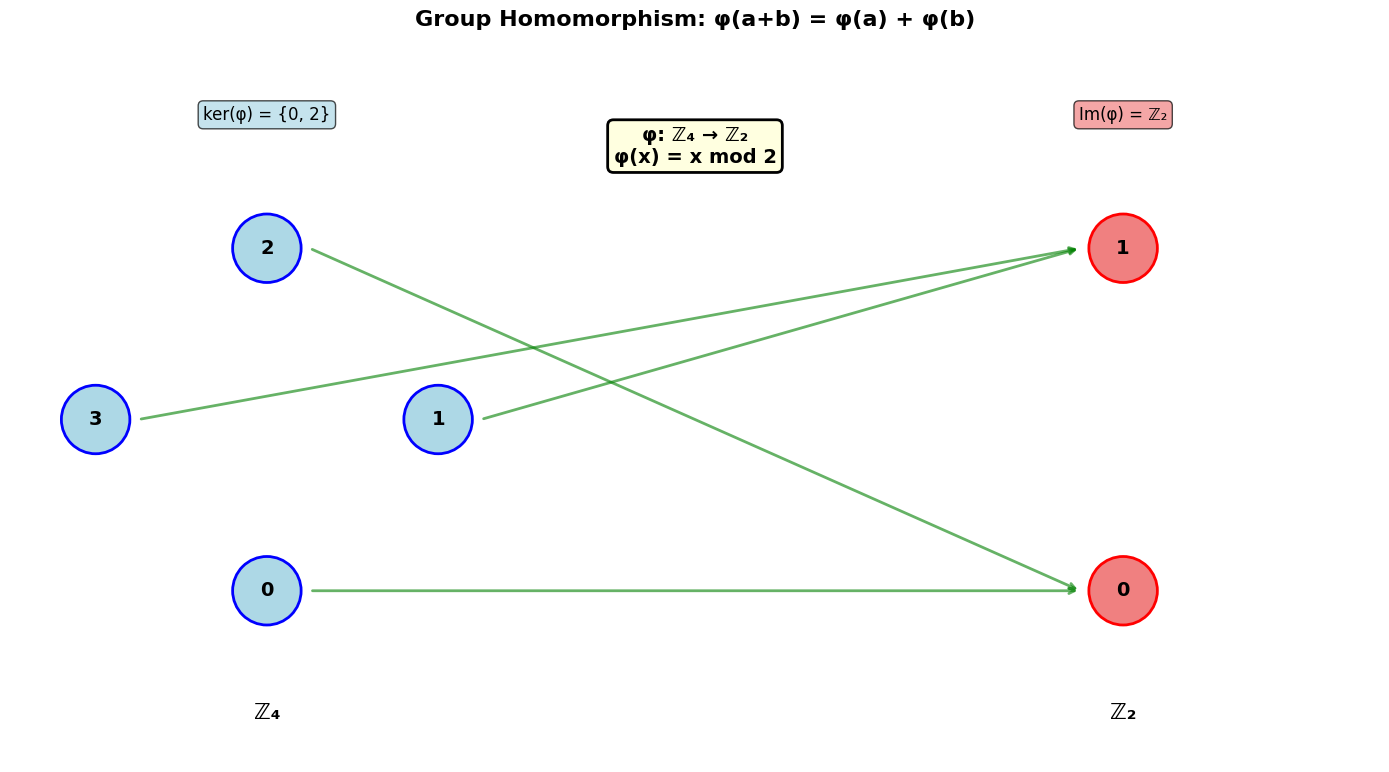

In [11]:
def visualize_homomorphism():
    fig, ax = plt.subplots(figsize=(14, 8))
    
    n1 = 4
    angles1 = np.linspace(0, 2*np.pi, n1, endpoint=False) - np.pi/2
    r1 = 2
    x1 = -5 + r1 * np.cos(angles1)
    y1 = 0 + r1 * np.sin(angles1)
    
    n2 = 2
    angles2 = np.linspace(0, 2*np.pi, n2, endpoint=False) - np.pi/2
    r2 = 2
    x2 = 5 + r2 * np.cos(angles2)
    y2 = 0 + r2 * np.sin(angles2)
    
    for i in range(n1):
        circle = Circle((x1[i], y1[i]), 0.4, color='lightblue',
                       ec='blue', linewidth=2, zorder=3)
        ax.add_patch(circle)
        ax.text(x1[i], y1[i], str(i), ha='center', va='center',
               fontsize=14, weight='bold', zorder=4)
    
    ax.text(-5, -3.5, 'ℤ₄', ha='center', fontsize=16, weight='bold')
    
    for i in range(n2):
        circle = Circle((x2[i], y2[i]), 0.4, color='lightcoral',
                       ec='red', linewidth=2, zorder=3)
        ax.add_patch(circle)
        ax.text(x2[i], y2[i], str(i), ha='center', va='center',
               fontsize=14, weight='bold', zorder=4)
    
    ax.text(5, -3.5, 'ℤ₂', ha='center', fontsize=16, weight='bold')
    
    for i in range(n1):
        target = i % 2
        ax.annotate('', xy=(x2[target]-0.5, y2[target]), 
                   xytext=(x1[i]+0.5, y1[i]),
                   arrowprops=dict(arrowstyle='->', lw=2, 
                                 color='green', alpha=0.6))
    
    ax.text(0, 3, 'φ: ℤ₄ → ℤ₂\nφ(x) = x mod 2', ha='center',
           fontsize=14, weight='bold',
           bbox=dict(boxstyle='round', facecolor='lightyellow', 
                    edgecolor='black', linewidth=2))
    
    ax.text(-5, 3.5, 'ker(φ) = {0, 2}', ha='center', fontsize=12,
           bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    ax.text(5, 3.5, 'Im(φ) = ℤ₂', ha='center', fontsize=12,
           bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))
    
    ax.set_xlim(-8, 8)
    ax.set_ylim(-4, 4.5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Group Homomorphism: φ(a+b) = φ(a) + φ(b)', fontsize=16, weight='bold')
    plt.tight_layout()
    return fig

fig15 = visualize_homomorphism()
plt.show()

##### Quaternions
The Quaternions are a set of eight elements $\{\pm 1, \pm i, \pm j, \pm k\}$ governed by the following  multiplication rules:
- $i^2 = j^2 = k^2 = ijk = -1$
- $1$ is the identity element, and $-1$ commutes with all elements.
- Non-commutative Multiplication: $ij = k$, but $ji = -k$ $jk = i$, but $kj = -i$ $ki = j$, but $ik = -j$ 

Properties: It is Non-Abelian, the order of multiplication matters $(ij \neq ji)$. All subgroups of $Q_8$ are normal, yet $Q_8$ is not an Abelian group. A group where all subgroups are normal is called a Hamiltonian group. Center: The center of the group (elements that commute with everything) is $Z(Q_8) = \{1, -1\}$.

The Quaternion Group (denoted as $Q_8$) is one of the most famous examples of a non-Abelian group. It was discovered by Sir William Rowan Hamilton in 1843 as an extension of complex numbers into three-dimensional space.


##### Visual fro the orbit-stabilizer theorem.

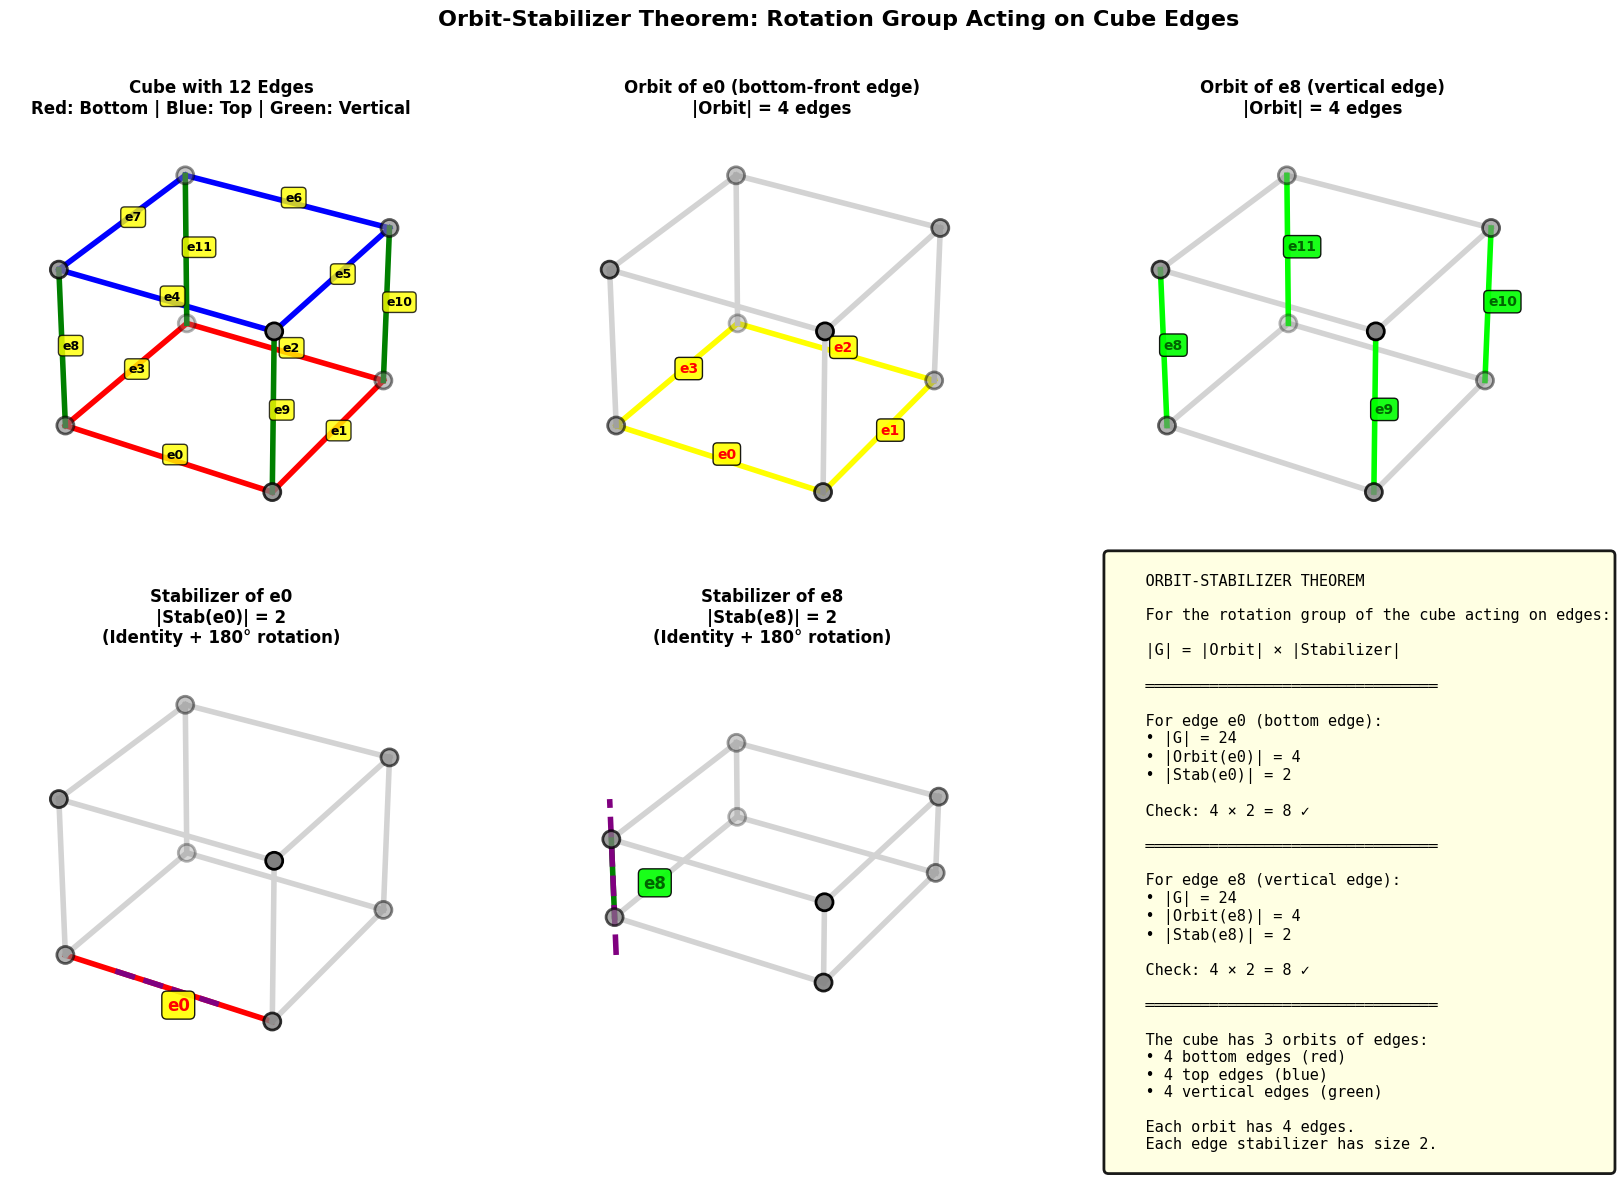

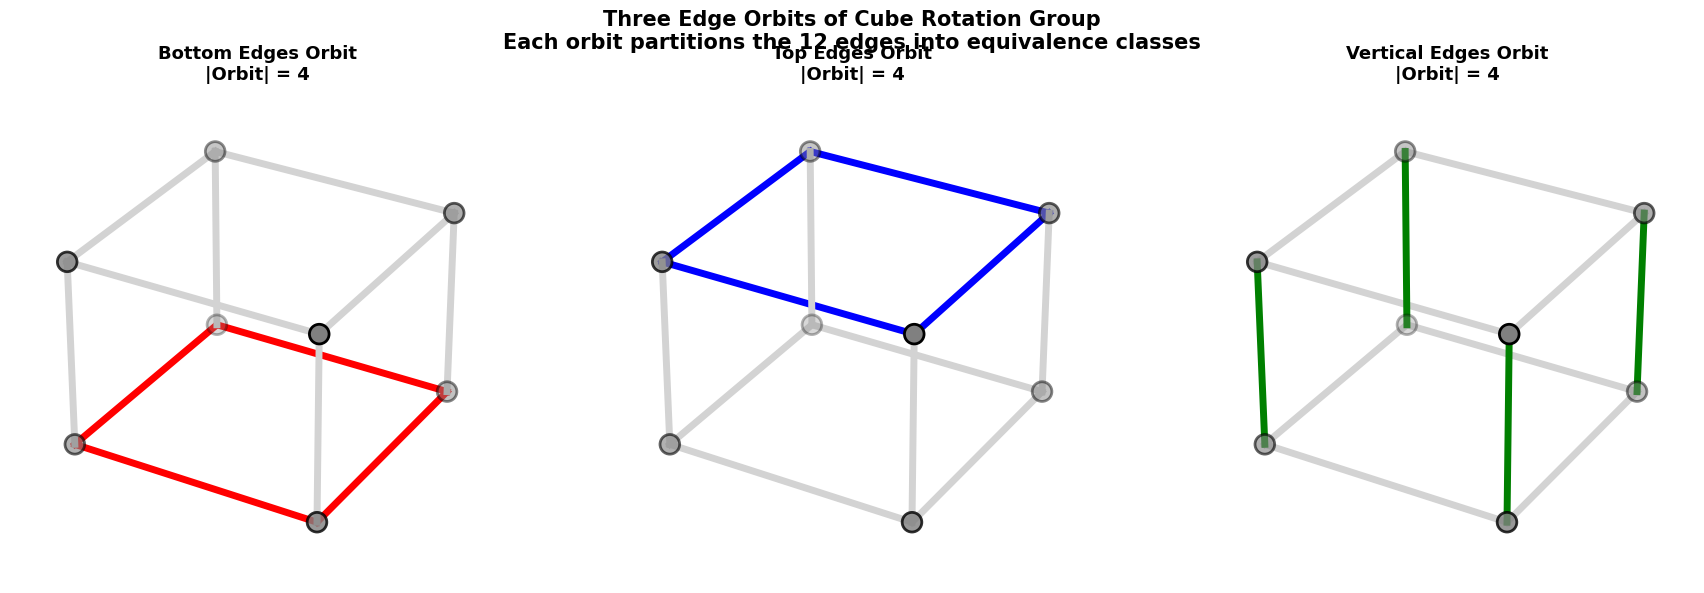

In [22]:
def draw_cube_edges(ax, vertices, edges, edge_colors=None, linewidth=3, alpha=1.0):
    """Draw cube edges with optional coloring"""
    if edge_colors is None:
        edge_colors = ['black'] * len(edges)
    
    for edge, color in zip(edges, edge_colors):
        points = vertices[list(edge)]
        ax.plot3D(*points.T, color=color, linewidth=linewidth, alpha=alpha)

def draw_cube_vertices(ax, vertices, vertex_colors=None, size=100):
    """Draw cube vertices with optional coloring"""
    if vertex_colors is None:
        vertex_colors = ['gray'] * len(vertices)
    
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], 
              c=vertex_colors, s=size, edgecolors='black', linewidth=2, zorder=10)

def visualize_cube_orbit_stabilizer():
    """
    Visualize orbit-stabilizer theorem using rigid symmetries of a cube.
    Focus on the action of the rotation group on the edges of the cube.
    """
    
    # Define cube vertices
    vertices = np.array([
        [-1, -1, -1],  # 0
        [ 1, -1, -1],  # 1
        [ 1,  1, -1],  # 2
        [-1,  1, -1],  # 3
        [-1, -1,  1],  # 4
        [ 1, -1,  1],  # 5
        [ 1,  1,  1],  # 6
        [-1,  1,  1],  # 7
    ])
    
    # Define 12 edges of the cube
    edges = [
        # Bottom face
        (0, 1), (1, 2), (2, 3), (3, 0),
        # Top face
        (4, 5), (5, 6), (6, 7), (7, 4),
        # Vertical edges
        (0, 4), (1, 5), (2, 6), (3, 7)
    ]
    
    edge_names = [
        'e0', 'e1', 'e2', 'e3',  # bottom
        'e4', 'e5', 'e6', 'e7',  # top
        'e8', 'e9', 'e10', 'e11'  # vertical
    ]
    
    # Classify edges by type
    # Type 1: Bottom edges (0-3)
    # Type 2: Top edges (4-7)
    # Type 3: Vertical edges (8-11)
    
    fig = plt.figure(figsize=(18, 12))
    
    # ======================
    # Panel 1: Original Cube with labeled edges
    # ======================
    ax1 = fig.add_subplot(2, 3, 1, projection='3d')
    
    # Color edges by type
    edge_type_colors = (
        ['red'] * 4 +      # bottom (red)
        ['blue'] * 4 +     # top (blue)
        ['green'] * 4      # vertical (green)
    )
    
    draw_cube_edges(ax1, vertices, edges, edge_type_colors, linewidth=4)
    draw_cube_vertices(ax1, vertices, size=150)
    
    # Label edges at midpoints
    for i, (v1, v2) in enumerate(edges):
        midpoint = (vertices[v1] + vertices[v2]) / 2
        ax1.text(midpoint[0], midpoint[1], midpoint[2], edge_names[i],
                fontsize=9, weight='bold', 
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))
    
    ax1.set_title('Cube with 12 Edges\nRed: Bottom | Blue: Top | Green: Vertical',
                 fontsize=12, weight='bold')
    ax1.set_axis_off()
    
    # ======================
    # Panel 2: Orbit of a bottom edge (e0)
    # ======================
    ax2 = fig.add_subplot(2, 3, 2, projection='3d')
    
    # The orbit of e0 under rotation group consists of all 4 bottom edges
    # (90° rotations around vertical axis)
    orbit_e0 = [0, 1, 2, 3]  # All bottom edges
    
    orbit_colors = ['yellow' if i in orbit_e0 else 'lightgray' for i in range(12)]
    
    draw_cube_edges(ax2, vertices, edges, orbit_colors, linewidth=4)
    draw_cube_vertices(ax2, vertices, size=150)
    
    # Highlight the orbit
    for idx in orbit_e0:
        v1, v2 = edges[idx]
        midpoint = (vertices[v1] + vertices[v2]) / 2
        ax2.text(midpoint[0], midpoint[1], midpoint[2], edge_names[idx],
                fontsize=10, weight='bold', color='red',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.9))
    
    ax2.set_title(f'Orbit of e0 (bottom-front edge)\n|Orbit| = {len(orbit_e0)} edges',
                 fontsize=12, weight='bold')
    ax2.set_axis_off()
    
    # ======================
    # Panel 3: Orbit of a vertical edge (e8)
    # ======================
    ax3 = fig.add_subplot(2, 3, 3, projection='3d')
    
    # The orbit of e8 consists of all 4 vertical edges
    orbit_e8 = [8, 9, 10, 11]  # All vertical edges
    
    orbit_colors2 = ['lime' if i in orbit_e8 else 'lightgray' for i in range(12)]
    
    draw_cube_edges(ax3, vertices, edges, orbit_colors2, linewidth=4)
    draw_cube_vertices(ax3, vertices, size=150)
    
    # Highlight the orbit
    for idx in orbit_e8:
        v1, v2 = edges[idx]
        midpoint = (vertices[v1] + vertices[v2]) / 2
        ax3.text(midpoint[0], midpoint[1], midpoint[2], edge_names[idx],
                fontsize=10, weight='bold', color='darkgreen',
                bbox=dict(boxstyle='round', facecolor='lime', alpha=0.9))
    
    ax3.set_title(f'Orbit of e8 (vertical edge)\n|Orbit| = {len(orbit_e8)} edges',
                 fontsize=12, weight='bold')
    ax3.set_axis_off()
    
    # ======================
    # Panel 4: Stabilizer of e0
    # ======================
    ax4 = fig.add_subplot(2, 3, 4, projection='3d')
    
    # Stabilizer of e0: rotations that fix the bottom-front edge
    # Only 180° rotation around the midpoint of e0 or identity
    # Actually, for edge e0 (bottom front), the stabilizer is:
    # {identity, 180° rotation around axis through e0 midpoint}
    # Size = 2
    
    stabilizer_size_e0 = 2
    
    # Show e0 in special color
    stab_colors = ['red' if i == 0 else 'lightgray' for i in range(12)]
    
    draw_cube_edges(ax4, vertices, edges, stab_colors, linewidth=4)
    draw_cube_vertices(ax4, vertices, size=150)
    
    v1, v2 = edges[0]
    midpoint = (vertices[v1] + vertices[v2]) / 2
    
    # Draw rotation axis
    axis_start = midpoint - np.array([0.5, 0, 0])
    axis_end = midpoint + np.array([0.5, 0, 0])
    ax4.plot3D([axis_start[0], axis_end[0]], 
              [axis_start[1], axis_end[1]], 
              [axis_start[2], axis_end[2]], 
              'purple', linewidth=4, linestyle='--', label='Rotation axis')
    
    ax4.text(midpoint[0], midpoint[1], midpoint[2] - 0.3, 'e0',
            fontsize=12, weight='bold', color='red',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.9))
    
    ax4.set_title(f'Stabilizer of e0\n|Stab(e0)| = {stabilizer_size_e0}\n(Identity + 180° rotation)',
                 fontsize=12, weight='bold')
    ax4.set_axis_off()
    
    # ======================
    # Panel 5: Stabilizer of e8
    # ======================
    ax5 = fig.add_subplot(2, 3, 5, projection='3d')
    
    # Stabilizer of e8: rotations that fix the vertical edge
    # {identity, 180° rotation around e8 axis}
    stabilizer_size_e8 = 2
    
    stab_colors2 = ['green' if i == 8 else 'lightgray' for i in range(12)]
    
    draw_cube_edges(ax5, vertices, edges, stab_colors2, linewidth=4)
    draw_cube_vertices(ax5, vertices, size=150)
    
    v1, v2 = edges[8]
    midpoint = (vertices[v1] + vertices[v2]) / 2
    
    # Draw rotation axis (vertical)
    ax5.plot3D([midpoint[0], midpoint[0]], 
              [midpoint[1], midpoint[1]], 
              [-2, 2], 
              'purple', linewidth=4, linestyle='--', label='Rotation axis')
    
    ax5.text(midpoint[0] + 0.3, midpoint[1], midpoint[2], 'e8',
            fontsize=12, weight='bold', color='darkgreen',
            bbox=dict(boxstyle='round', facecolor='lime', alpha=0.9))
    
    ax5.set_title(f'Stabilizer of e8\n|Stab(e8)| = {stabilizer_size_e8}\n(Identity + 180° rotation)',
                 fontsize=12, weight='bold')
    ax5.set_axis_off()
    
    # ======================
    # Panel 6: Orbit-Stabilizer Theorem Summary
    # ======================
    ax6 = fig.add_subplot(2, 3, 6)
    ax6.axis('off')
    
    # The rotation group of the cube has order 24
    group_order = 24
    
    summary_text = f"""
    ORBIT-STABILIZER THEOREM
    
    For the rotation group of the cube acting on edges:
    
    |G| = |Orbit| × |Stabilizer|
    
    ════════════════════════════════
    
    For edge e0 (bottom edge):
    • |G| = {group_order}
    • |Orbit(e0)| = {len(orbit_e0)}
    • |Stab(e0)| = {stabilizer_size_e0}
    
    Check: {len(orbit_e0)} × {stabilizer_size_e0} = {len(orbit_e0) * stabilizer_size_e0} ✓
    
    ════════════════════════════════
    
    For edge e8 (vertical edge):
    • |G| = {group_order}
    • |Orbit(e8)| = {len(orbit_e8)}
    • |Stab(e8)| = {stabilizer_size_e8}
    
    Check: {len(orbit_e8)} × {stabilizer_size_e8} = {len(orbit_e8) * stabilizer_size_e8} ✓
    
    ════════════════════════════════
    
    The cube has 3 orbits of edges:
    • 4 bottom edges (red)
    • 4 top edges (blue)  
    • 4 vertical edges (green)
    
    Each orbit has 4 edges.
    Each edge stabilizer has size 2.
    """
    
    ax6.text(0.1, 0.5, summary_text, fontsize=11, family='monospace',
            verticalalignment='center',
            bbox=dict(boxstyle='round', facecolor='lightyellow', 
                     edgecolor='black', linewidth=2, alpha=0.9))
    
    plt.suptitle('Orbit-Stabilizer Theorem: Rotation Group Acting on Cube Edges',
                fontsize=16, weight='bold', y=0.98)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    return fig

# Create the visualization
fig = visualize_cube_orbit_stabilizer()
plt.show()

# Additional visualization: All three edge orbits
def visualize_all_edge_orbits():
    """Show all three orbits of edges under cube rotations"""
    
    vertices = np.array([
        [-1, -1, -1],  # 0
        [ 1, -1, -1],  # 1
        [ 1,  1, -1],  # 2
        [-1,  1, -1],  # 3
        [-1, -1,  1],  # 4
        [ 1, -1,  1],  # 5
        [ 1,  1,  1],  # 6
        [-1,  1,  1],  # 7
    ])
    
    edges = [
        (0, 1), (1, 2), (2, 3), (3, 0),  # bottom
        (4, 5), (5, 6), (6, 7), (7, 4),  # top
        (0, 4), (1, 5), (2, 6), (3, 7)   # vertical
    ]
    
    fig = plt.figure(figsize=(18, 6))
    
    orbit_sets = [
        ([0, 1, 2, 3], 'Bottom Edges Orbit', 'red'),
        ([4, 5, 6, 7], 'Top Edges Orbit', 'blue'),
        ([8, 9, 10, 11], 'Vertical Edges Orbit', 'green')
    ]
    
    for idx, (orbit, title, color) in enumerate(orbit_sets):
        ax = fig.add_subplot(1, 3, idx + 1, projection='3d')
        
        edge_colors = [color if i in orbit else 'lightgray' for i in range(12)]
        
        draw_cube_edges(ax, vertices, edges, edge_colors, linewidth=5)
        draw_cube_vertices(ax, vertices, size=200)
        
        ax.set_title(f'{title}\n|Orbit| = {len(orbit)}',
                    fontsize=13, weight='bold')
        ax.set_axis_off()
    
    plt.suptitle('Three Edge Orbits of Cube Rotation Group\nEach orbit partitions the 12 edges into equivalence classes',
                fontsize=15, weight='bold')
    plt.tight_layout()
    return fig

fig2 = visualize_all_edge_orbits()
plt.show()